# 图像预处理

In [4]:
import matplotlib.pyplot as plt
import numpy as np

## PIL

PIL (Python Imaging Library) 是 Python 中一个著名的图像处理库，专为图像处理任务设计。然而，它已经停止更新，功能由其分支 Pillow 接管。因此，现代开发中通常使用 Pillow 来代替 PIL。

`pip install pillow`

### 加载图像

In [21]:
from PIL import Image

# 加载图像 (本地路径)
image = Image.open("../data/cats_and_dogs_small/train/cats/cat.2.jpg")

In [22]:
# 获取图像大小
width, height = image.size
print("图像宽度:", width)
print("图像高度:", height)
print("图像大小 (宽, 高):", image.size)

图像宽度: 312
图像高度: 396
图像大小 (宽, 高): (312, 396)


### 查看图像

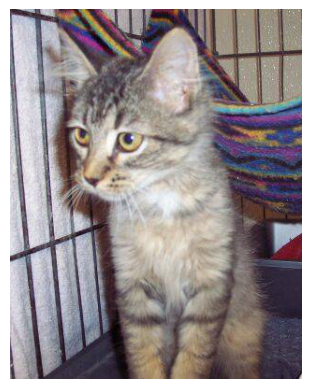

In [23]:
# 显示图像
plt.imshow(image)
plt.axis("off")  # 隐藏坐标轴
plt.show()

### 转换图像格式

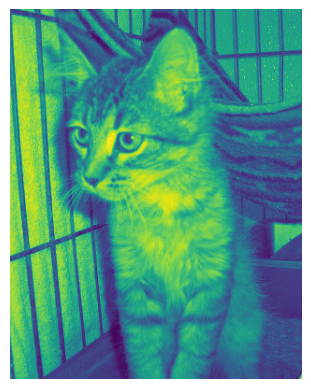

In [24]:
# 将图像转换为灰度图
gray_img = image.convert('L')
plt.imshow(gray_img)
plt.axis("off")  # 隐藏坐标轴
plt.show()

### 裁剪图像

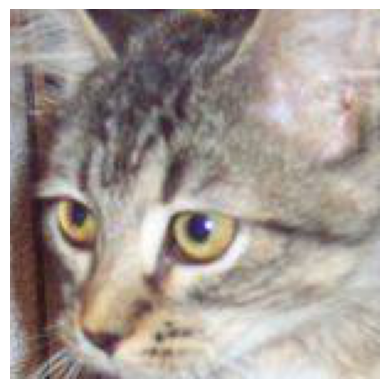

In [25]:
# 裁剪图像的一部分
left = 50 # 裁剪区域的左边界的像素值。
top = 50 # 裁剪区域的上边界的像素值。
right = 200 # 裁剪区域的右边界的像素值（不包含该像素）。
bottom = 200 # 裁剪区域的下边界的像素值（不包含该像素）。
cropped = image.crop((left, top, right, bottom))
plt.imshow(cropped)
plt.axis("off")  # 隐藏坐标轴
plt.show()

### 缩放图像

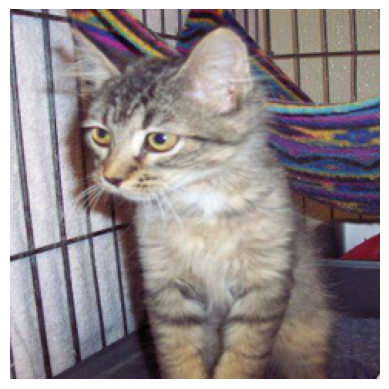

In [26]:
# 缩放图像
width = 240 # 调整后的图像宽度（像素值）。
height = 240 # 调整后的图像高度（像素值）。
# resample（可选）: 指定重采样过滤器，用于调整大小时插值。
resized = image.resize((width, height))
plt.imshow(resized)
plt.axis("off")  # 隐藏坐标轴
plt.show()

### 旋转图像

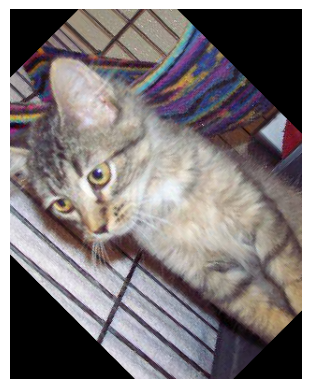

In [27]:
# 旋转图像
angle = 45 # (必选): 旋转角度（逆时针方向）。正值表示逆时针旋转，负值表示顺时针旋转。
rotated = image.rotate(angle)
plt.imshow(rotated)
plt.axis("off")  # 隐藏坐标轴
plt.show()

### 保存图像

In [28]:
# 保存图像
rotated.save('../images/output1.jpg')

## OpenCV

OpenCV (Open Source Computer Vision Library) 是一个强大的计算机视觉和机器学习开源库，用于实时图像和视频处理。它提供了丰富的功能集，支持多种编程语言（如 C++、Python 和 Java），并且跨平台兼容。

`pip install opencv-python`

### 加载图像

In [1]:
import cv2

# 加载图像
image = cv2.imread("../data/cats_and_dogs_small/train/cats/cat.2.jpg")  # 默认加载为彩色图像

#### 查看图像大小

In [31]:
# 查看图像大小
height, width = image.shape[:2]  # 高度和宽度
channels = image.shape[2] if len(image.shape) == 3 else 1  # 通道数

print(f"图像宽度: {width} 像素")
print(f"图像高度: {height} 像素")
print(f"图像通道数: {channels}")

图像宽度: 312 像素
图像高度: 396 像素
图像通道数: 3


image.shape:

- 如果是彩色图像，shape 返回 (高度, 宽度, 通道数)，例如 (600, 800, 3) 表示图像高度为 600 像素，宽度为 800 像素，RGB 三个通道。
- 如果是灰度图像，shape 返回 (高度, 宽度)，没有通道数。

#### 图像总像素数

In [32]:
total_pixels = height * width
print(f"图像总像素数: {total_pixels}")

图像总像素数: 123552


#### 图像占用内存

In [34]:
# 每个像素通常占用 1 字节（灰度图像）或 3 字节（RGB 图像）
image_memory = image.nbytes  # 单位：字节
print(f"图像占用内存: {image_memory / 1024:.2f} KB")

图像占用内存: 361.97 KB


#### 查看像素值

在 OpenCV 中，可以通过直接访问图像（NumPy 数组）的索引来查看每个像素的值。不同类型的图像（灰度图和彩色图）处理方法稍有不同。

在灰度图像中，每个像素只有一个值，范围通常为 0 到 255。

In [37]:
# 查看某个像素值（行, 列）
# 加载为灰度图像
gray_image = cv2.imread("../data/cats_and_dogs_small/train/cats/cat.2.jpg", cv2.IMREAD_GRAYSCALE)
pixel_value = gray_image[100, 150]  # 第 100 行，第 150 列的像素值
print(f"像素值: {pixel_value}")

像素值: 166


在彩色图像中，每个像素由多个通道（通常为 BGR 通道）组成。可以单独访问每个通道的值。

In [38]:
# 查看某个像素的 BGR 值
b, g, r = image[100, 150]  # 第 100 行，第 150 列的 BGR 值
print(f"B: {b}, G: {g}, R: {r}") 

B: 154, G: 165, R: 173


### 查看图像

In [8]:
# 显示图像
cv2.imshow("Cat Image", image)
# 等待按键关闭窗口
cv2.waitKey(0)
cv2.destroyAllWindows()

在 Python 中，OpenCV 使用 BGR 颜色顺序，而 Matplotlib 使用 RGB 颜色顺序。直接显示可能导致颜色错乱，需要转换颜色

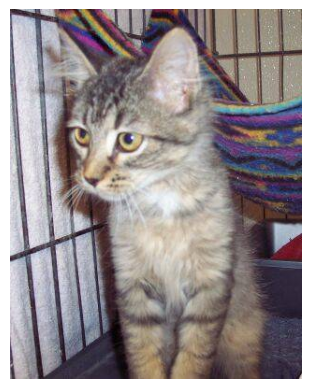

In [11]:
# 显示图像
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)
plt.axis("off")  # 隐藏坐标轴
plt.show()

### 转换图像格式

In [10]:
# 加载为灰度图像
gray_image = cv2.imread("../data/cats_and_dogs_small/train/cats/cat.2.jpg", cv2.IMREAD_GRAYSCALE)
# 显示图像
cv2.imshow("Cat Image", gray_image)
# 等待按键关闭窗口
cv2.waitKey(0)
cv2.destroyAllWindows()

### 裁剪图像

In [15]:
# y1, y2 是行的起始和结束索引，对应图像的高度。
# x1, x2 是列的起始和结束索引，对应图像的宽度。
# 裁剪图像 (格式: image[y1:y2, x1:x2])
cropped_image = image[50: 200, 50: 200]  # 裁剪矩形区域

# 显示裁剪后的图像
cv2.imshow("Cropped Image", cropped_image)

# 等待按键关闭窗口
cv2.waitKey(0)
cv2.destroyAllWindows()

### 缩放图像

In [16]:
# 缩放图像到指定大小 (宽, 高)
resized_image = cv2.resize(image, (200, 200))  # 缩放为 200x200 像素

# 显示缩放后的图像
cv2.imshow("Resized Image", resized_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 旋转图像

In [18]:
# 获取图像中心
(h, w) = image.shape[:2]
center = (w // 2, h // 2)

# 定义旋转角度（顺时针为正角度）
angle = 45  # 旋转 45 度

# 获取旋转矩阵
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale=1.0)  # scale 控制缩放

# 应用仿射变换进行旋转
rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))

# 显示结果
cv2.imshow("Rotated Image (45°)", rotated_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 保存图像

In [29]:
# 保存图像到文件
cv2.imwrite('../images/output2.jpg', gray_image)

True

# 图像特征提取

## 边缘检测

cv2.Canny 是 OpenCV 提供的边缘检测算法，基于 John F. Canny 的经典边缘检测方法。它通过计算图像的梯度来检测边缘，是计算机视觉中常用的图像处理工具。

使用 cv2.Canny 的基本流程
- 转换为灰度图像。
- 对图像进行高斯模糊（减少噪声）。
- 使用 cv2.Canny 检测边缘。

`cv2.Canny(image, threshold1, threshold2, apertureSize=3, L2gradient=False)`

参数说明：  
- image: 输入的灰度图像。如果输入是彩色图像，需要先转换为灰度。
- threshold1 和 threshold2:
    - threshold1: 最低阈值，用于弱边缘连接。
    - threshold2: 最高阈值，用于强边缘检测。 一般推荐 threshold2 的值是 threshold1 的两倍。
- apertureSize:
    - Sobel 算子的核大小，默认为 3。支持值为奇数，如 3、5、7 等。
    - 较大的值会使检测结果更加平滑，但可能会丢失细节。
- L2gradient:
是否使用更精确的梯度幅值计算公式。如果为 True，使用欧几里得距离；否则使用绝对值之和。

cv2.Canny 的输出是一个与输入图像同样大小的二值图像（边缘图像），通常像素值为以下两种：

- 边缘像素（255）：表示该像素是边缘的一部分。
- 非边缘像素（0）：表示该像素不是边缘。

在图像中，边缘通常表现为亮白色，其他部分为黑色。边缘像素是通过检测图像中强度变化较大的区域来判断的。

In [47]:
import cv2

# 加载图像
image = cv2.imread("../data/cats_and_dogs_small/train/cats/cat.2.jpg")

# 转换为灰度图像
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 应用高斯模糊（减少噪声）
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 1.4)

# Canny 边缘检测
edges = cv2.Canny(blurred_image, threshold1=50, threshold2=150)

# 显示结果
cv2.imshow("Original Image", image)
cv2.imshow("Edges", edges)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [40]:
# 将边缘检测结果展平成一维向量
features = edges.flatten()
features.shape

(123552,)

## 直方图

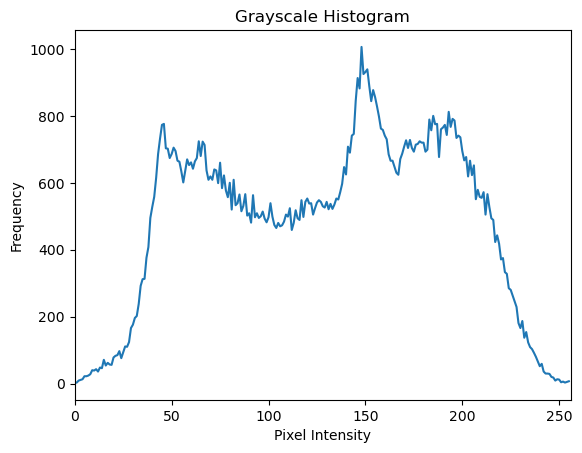

In [52]:
# 加载图像并转换为灰度图
image = cv2.imread("../data/cats_and_dogs_small/train/cats/cat.2.jpg", cv2.IMREAD_GRAYSCALE)

# 计算图像的灰度直方图
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# 显示直方图
plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.plot(hist)
plt.xlim([0, 256])  # x 轴范围为 [0, 256]
plt.show()

## SIFT (Scale-Invariant Feature Transform)

SIFT (Scale-Invariant Feature Transform) 是一种强大的图像特征提取算法，用于从图像中提取尺度不变和旋转不变的特征点。它能在不同尺度和旋转角度下有效地识别图像中的关键点，因此广泛应用于图像匹配、目标识别、3D 重建、图像拼接等领域。

**SIFT 主要步骤**

SIFT 主要包括以下几个步骤：

(1) 尺度空间的构建  
为了检测图像中具有不同尺度的特征点，SIFT 首先创建一个尺度空间，通过对图像应用不同的高斯模糊处理，得到多个尺度的图像。尺度空间的构建过程包括：

使用不同的高斯核对原图进行模糊，产生多个不同模糊程度的图像。
通过差异高斯图像 (Difference of Gaussian, DoG) 进行处理，计算相邻模糊图像之间的差异，寻找潜在的特征点。

(2) 关键点检测
在每个尺度图像中，SIFT 算法会比较每个像素与其邻域的像素值，确定局部最大值和局部最小值。然后，使用极值检测来从不同尺度中检测出特征点，确保这些特征点对尺度变化和旋转不敏感。

(3) 关键点定位
一旦检测到潜在的关键点，SIFT 算法会通过拟合局部邻域来准确地定位这些关键点。对于不稳定的特征点（例如，位于边缘的点），算法会将其剔除。

(4) 方向赋值
为了使特征点对旋转不变，SIFT 为每个关键点分配一个主方向。这个方向是通过计算关键点邻域区域的梯度方向来确定的，确保特征点在旋转变换后依然能够匹配。

(5) 特征描述符生成
最后，SIFT 为每个关键点生成一个描述符，描述符是基于关键点周围区域的梯度方向和幅度。该描述符具有高维度（通常为128维），能够准确地表示图像中某个局部区域的特征，进而用于匹配。

`keypoints, descriptors = sift.detectAndCompute(image, None)`

- keypoints：返回的关键点（特征点）列表。关键点是图像中有意义的局部区域，通常是纹理、角点、边缘等显著的部分。每个关键点包含了该点的位置、尺度、旋转角度等信息。
- descriptors：返回的描述符（特征描述符），是一个高维向量（通常是 128 维），用来描述每个关键点周围区域的局部特征。这些描述符可以用来进行图像匹配、目标识别等任务。描述符通常是基于该点周围的梯度信息计算的，因此对旋转和尺度变化具有一定的不变性。

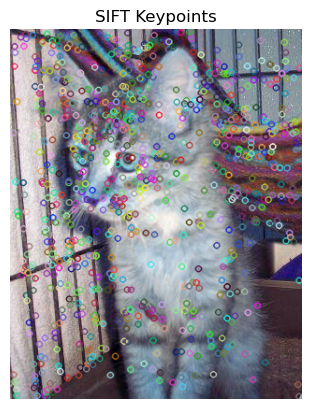

In [7]:
# 初始化 SIFT 检测器
sift = cv2.SIFT_create()

# 检测关键点和描述符
keypoints, descriptors = sift.detectAndCompute(image, None)

# 在图像中绘制关键点
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# 显示结果
plt.imshow(image_with_keypoints)
plt.title('SIFT Keypoints')
plt.axis('off')  # 关闭坐标轴显示
plt.show()

In [8]:
# 特征向量化
features = descriptors.flatten()
features.shape

(118400,)

## ORB (Oriented FAST and Rotated BRIEF)

ORB (Oriented FAST and Rotated BRIEF) 是一种快速且高效的特征提取和描述符算法，设计目的是提供一个开放且计算量较小的替代品，与 SIFT 和 SURF 相比，它更适合实时应用。

ORB 是基于两个经典算法的改进：

- FAST (Features from Accelerated Segment Test)：用于快速检测关键点。
- BRIEF (Binary Robust Independent Elementary Features)：用于计算关键点的描述符。

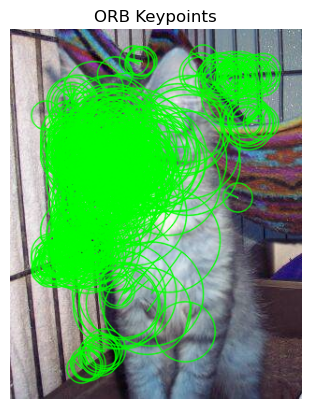

In [5]:
# 初始化 ORB 检测器
orb = cv2.ORB_create()

# 检测关键点和计算描述符
keypoints, descriptors = orb.detectAndCompute(image, None)

# 在图像中绘制关键点
image_with_keypoints = cv2.drawKeypoints(
    image, keypoints, None, color=(0, 255, 0), flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS
)

# 显示结果
plt.imshow(image_with_keypoints, cmap='gray')
plt.title('ORB Keypoints')
plt.axis('off')
plt.show()

In [6]:
# 特征向量化
features = descriptors.flatten()
features.shape

(15712,)